In [392]:
library(tidyverse)
library(DESeq2)
library(BiocParallel)
library(RColorBrewer)
library(pheatmap)
library(umap)

# Custom package
library(rutils)

In [45]:
n_cores <- detectCores() - 2
BiocParallel::register(MulticoreParam(n_cores))

In [2]:
projects <- c("TCGA-CESC", "TCGA-OV", "TCGA-UCS", "TCGA-UCEC")
data_root <- "../../../../../mnt/d"
count_files <- Sys.glob(paths = paste0(data_root, "/", "TCGA", "/", "matrix_count_data", "/*counts.tsv"))
coldata_files <- Sys.glob(paths = paste0(data_root, "/", "TCGA", "/", "matrix_count_data", "/*coldata.tsv"))

In [3]:
count_files
coldata_files

[1] "../../../../../mnt/d/TCGA/matrix_count_data/TCGA_CESC_counts.tsv"
[2] "../../../../../mnt/d/TCGA/matrix_count_data/TCGA_OV_counts.tsv"  
[3] "../../../../../mnt/d/TCGA/matrix_count_data/TCGA_UCEC_counts.tsv"
[4] "../../../../../mnt/d/TCGA/matrix_count_data/TCGA_UCS_counts.tsv"

[1] "../../../../../mnt/d/TCGA/matrix_count_data/TCGA_CESC_coldata.tsv"
[2] "../../../../../mnt/d/TCGA/matrix_count_data/TCGA_OV_coldata.tsv"  
[3] "../../../../../mnt/d/TCGA/matrix_count_data/TCGA_UCEC_coldata.tsv"
[4] "../../../../../mnt/d/TCGA/matrix_count_data/TCGA_UCS_coldata.tsv"

In [5]:
data_ls <- rutils::load_and_combine_count_matrix_data(
    count_files,
    coldata_files,
    count_join_symbols = c("ensembl_gene_id", "external_gene_name")
)

Parsed with column specification:
cols(
  .default = col_double(),
  ensembl_gene_id = col_character(),
  external_gene_name = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_double(),
  ensembl_gene_id = col_character(),
  external_gene_name = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_double(),
  ensembl_gene_id = col_character(),
  external_gene_name = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_double(),
  ensembl_gene_id = col_character(),
  external_gene_name = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  sample_name = col_character(),
  condition = col_character(),
  project = col_character()
)
Parsed with column specification:
cols(
  sample_name = col_character(),
  condition = col_character()

In [6]:
counts_df <- data_ls$counts_df
coldata_df <- data_ls$coldata_df

# Normalize counts

In [47]:
vst_counts_df <- counts_df
vst_counts_df[, -(1:2)] = vst(as.matrix(vst_counts_df[, -(1:2)]), blind = TRUE)

converting counts to integer mode


In [48]:
vst_counts_df

ensembl_gene_id,external_gene_name,TCGA-JX-A3Q8-01A-11R-A21T-07,TCGA-C5-A1BK-01B-11R-A13Y-07,TCGA-Q1-A73Q-01A-21R-A32P-07,TCGA-C5-A8YQ-01A-11R-A37O-07,TCGA-VS-A9UC-01A-11R-A42T-07,TCGA-C5-A1MF-01A-11R-A13Y-07,TCGA-ZJ-AAXT-01A-11R-A42T-07,TCGA-VS-A8EJ-01A-11R-A37O-07,⋯,TCGA-N7-A4Y0-01A-12R-A28V-07,TCGA-NA-A4QY-01A-11R-A28V-07,TCGA-N7-A4Y8-01A-11R-A28V-07,TCGA-N5-A4RU-01A-31R-A28V-07,TCGA-NA-A4R1-01A-11R-A28V-07,TCGA-N5-A59E-01A-11R-A28V-07,TCGA-N7-A4Y5-01A-12R-A28V-07,TCGA-NF-A4WU-01A-11R-A28V-07,TCGA-N9-A4Q7-01A-11R-A28V-07,TCGA-NG-A4VW-01A-11R-A28V-07
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,TSPAN6,12.612118,11.785058,10.963491,11.530039,11.475737,10.333884,9.462390,11.573884,⋯,11.226000,12.164399,12.080543,13.104866,10.223885,11.827220,10.504863,12.303567,10.408418,11.672330
ENSG00000000005,TNMD,3.656314,2.771117,2.771117,2.771117,2.771117,3.636598,2.771117,6.197968,⋯,2.771117,6.382844,10.118798,16.347777,3.822582,10.927176,5.126746,4.968183,3.529538,7.748204
ENSG00000000419,DPM1,11.015822,10.792020,11.026699,10.746655,10.247952,10.593439,10.573110,11.197393,⋯,10.951002,11.418258,11.385765,10.794979,10.690797,10.688463,11.478474,10.635197,11.472989,10.402311
ENSG00000000457,SCYL3,9.159181,9.757637,10.417315,9.416859,10.399493,8.912423,9.354990,9.296585,⋯,8.213965,9.011159,8.135924,9.424008,9.479511,9.150554,8.380551,9.718284,8.822437,10.416053
ENSG00000000460,C1orf112,9.037044,9.200389,10.496356,8.522835,10.953268,9.434567,9.472534,8.521225,⋯,8.230570,10.032457,9.521383,9.506157,10.332177,9.068387,8.117498,8.815045,9.282181,9.325874
ENSG00000000938,FGR,7.636830,9.833965,8.539452,7.574044,8.461121,7.612259,8.499614,6.573850,⋯,5.320887,7.404490,6.146661,6.619320,11.384669,6.769988,6.162031,7.349989,9.452851,5.543895
ENSG00000000971,CFH,12.279633,12.889248,7.549174,6.903744,9.856878,12.366319,11.829922,11.651688,⋯,10.037737,10.155082,10.310149,8.631695,11.642721,12.259385,11.170159,9.683667,11.189740,11.348775
ENSG00000001036,FUCA2,12.344511,12.005401,10.841189,8.019046,9.666850,11.817517,10.498960,10.893244,⋯,11.594265,11.017430,10.658021,11.682759,9.852641,12.087675,11.740620,11.569034,11.605804,10.532596
ENSG00000001084,GCLC,9.067670,11.057990,13.753933,11.412778,10.027198,8.870116,11.492993,9.722767,⋯,10.015163,10.134390,8.660045,10.521039,10.560745,9.807320,9.818518,10.048089,10.489110,10.420321


# Filter down to matrisome genes only

In [49]:
matrisome_df <- rutils::load_matrisome_df(
    paste0(data_root, "/", "unified_TCGA_GTEx_data", "/", "matrisome", "/", "matrisome_hs_masterlist.tsv")
)

Parsed with column specification:
cols(
  Division = col_character(),
  Category = col_character(),
  `Gene Symbol` = col_character(),
  `Gene Name` = col_character(),
  Synonyms = col_character(),
  HGNC_IDs = col_double(),
  `HGNC_IDs Links` = col_double(),
  UniProt_IDs = col_character(),
  Refseq_IDs = col_character(),
  Orthology = col_character(),
  Notes = col_character()
)


In [52]:
matrisome_mask <- counts_df$external_gene_name %in% matrisome_df$gene_symbol

In [53]:
matrisome_vst_counts_df <- vst_counts_df[matrisome_mask, ]

### Any repeat entries among matrisome genes?

In [54]:
# If these lengths are the same, there are no repeat entries
# among nmatrisome genes
nrow(matrisome_vst_counts_df) == length(unique(matrisome_counts_df$external_gene_name))

[1] TRUE

### No longer care about Ensembl Gene IDs

In [58]:
matrisome_vst_counts_df <- matrisome_vst_counts_df %>%
    dplyr::select(-ensembl_gene_id)

# Functions

In [252]:
pca_scatter <- function(df, pc_x, pc_y, col) {
    plt <- ggplot(df) +
        aes_string(x = pc_x, y = pc_y, color = col) +
        geom_point(size=1) +
        xlab(paste0(pc_x)) + 
        ylab(paste0(pc_y)) +
        coord_fixed()
    return(plt)
}


get_project_centroids <- function(counts, coldata, projs) {
    centroids <- list()
    for (proj in projs) {
        proj_mask <- coldata$project == proj
        proj_samples <- coldata$sample_name[proj_mask]
        # Use medians as centroids since we know there are many outliers
        centroid <- rowMedians(as.matrix(counts[, proj_samples]))
        centroids[[proj]] <- centroid
    }
    return(as_tibble(centroids))
}


l1_dist <- function(x, y) {
    return(sum(abs(x - y)))
}


z_score <- function(x){
  (x - mean(x)) / sd(x)
}


find_n_closest <- function(counts, centroid, n) {
    res <- apply(counts, 2, function(x) { l1_dist(x, centroid) })
    return(
        res %>%
            as_tibble(rownames = "sample_name") %>%
            top_n(-n, wt = value)
    )
}



heatmap_sample <- function(counts, coldata, centroids, projs, n) {
    samples <- list()
    for (proj in projs) {
        proj_mask <- coldata$project == proj
        proj_counts <- counts[, coldata$sample_name[proj_mask]]
        centroid <- centroids[[proj]]
        res <- find_n_closest(proj_counts, centroid, n) %>%
            mutate(project = proj)
        print(dim(res))
        samples[[proj]] <- res
    }
    return(bind_rows(samples))
}

# PCA

In [112]:
pca_res <- prcomp(t(matrisome_vst_counts), center = TRUE, scale. = FALSE)

In [113]:
pca_res_df <- pca_res$x %>%
    as_tibble(rownames = "sample_name") %>%
    mutate(project = coldata_df$project)

In [114]:
pca_var <- pca_res$sdev ^ 2
pca_pct_var <- round(pca_var / sum(pca_var) * 100, 3)
pca_var_df <- tibble(PC = colnames(pca_res$x), var = pca_var, pct_var = pca_pct_var) %>%
    mutate(PC_fact = factor(colnames(pca_res$x), levels = colnames(pca_res$x)))

# Heatmaps: TODO

## Find centroids
We want to find centroids in a reduced space, so we use PCA results

In [277]:
# Do this with dimensionally reduced data?
centroids <- get_project_centroids(matrisome_vst_counts_df, coldata_df, sub("-", "_", projects))

In [278]:
hm_sample_meta_df <- heatmap_sample(matrisome_vst_counts_df, coldata_df, centroids, sub("-", "_", projects), 10)

[1] 10  3
[1] 10  3
[1] 10  3
[1] 10  3


In [382]:
hm_sample_df <- matrisome_vst_counts_df[, hm_sample_meta_df$sample_name]

## Drop genes where sd is too low

In [384]:
gene_sd_mask <- rowSds(as.matrix(hm_sample_df)) > 1e-10
hm_sample_df <- hm_sample_df[gene_sd_mask, ]

In [418]:
hm_sample_coldata_df <- coldata_df %>%
    dplyr::filter(sample_name %in% colnames(hm_sample_df))

In [385]:
dim(hm_sample_df)

[1] 998  40

In [386]:
col_dist <- as.dist(1 - cor(hm_sample_df, method = "spearman"))
row_dist <- as.dist(1 - cor(t(hm_sample_df), method = "pearson"))

col_clust <- hclust(col_dist, method = "complete")
row_clust <- hclust(row_dist, method = "complete")

In [387]:
z_score_mat <- t(apply(hm_sample_df, 1, z_score))

In [419]:
proj_colors <- list(project = brewer.pal(n = 4, name = "Set1"))
names(proj_colors$project) <- unique(hm_sample_coldata_df$project)

In [433]:
hm_sample_coldata_df_sorted <- hm_sample_coldata_df[match(colnames(hm_sample_df), hm_sample_coldata_df$sample_name), ]


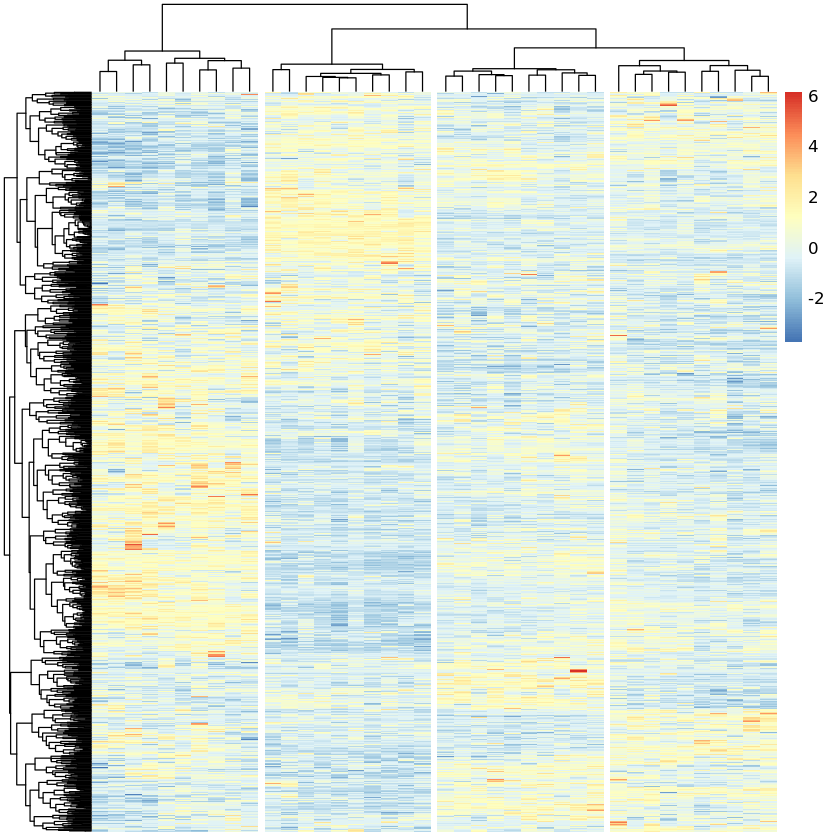

In [438]:
hm <- pheatmap(
    z_score_mat,
    cluster_rows = row_clust,
    cluster_cols = col_clust,
    cutree_cols = 4,
    show_rownames = FALSE,
    show_colnames = FALSE
)

# PCA Plots

In [111]:
matrisome_vst_counts <- matrisome_vst_counts_df %>%
    column_to_rownames(var = "external_gene_name") %>%
    as.matrix()

Saving 6.67 x 6.67 in image


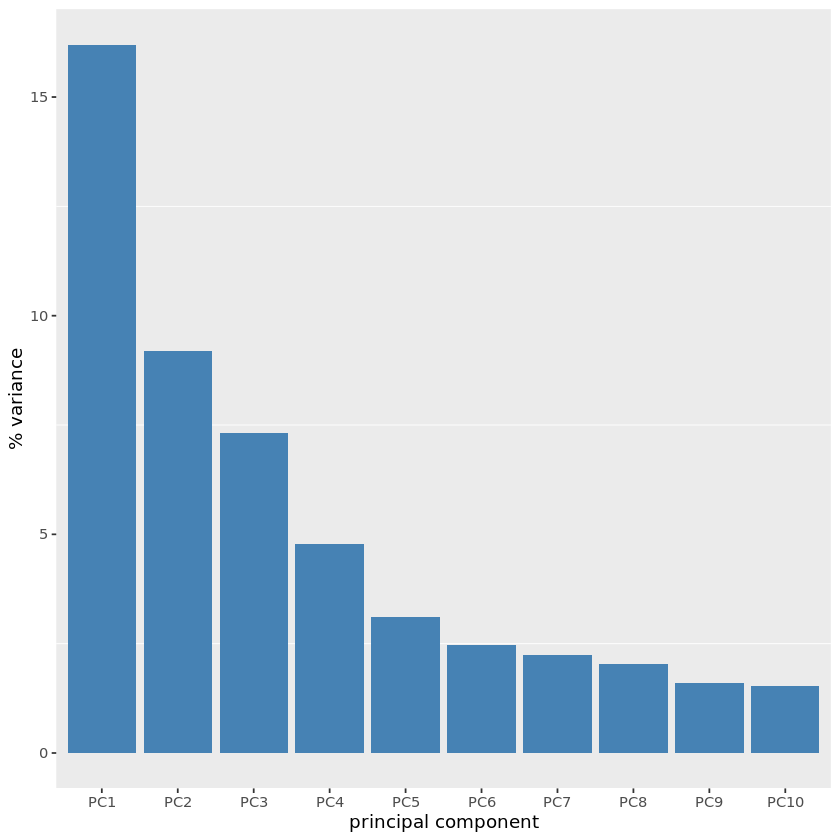

In [116]:
ggplot() +
    geom_bar(aes(x = PC_fact, y = pct_var), data = pca_var_df[1:10, ], stat = "identity", fill = "steelblue") +
    xlab(label = "principal component") +
    ylab(label = "% variance") +
    theme(panel.grid.major = element_blank())
ggsave(filename = paste(data_root, "TCGA", "figures", "screeplot.png", sep = "/"), last_plot())

Saving 6.67 x 6.67 in image


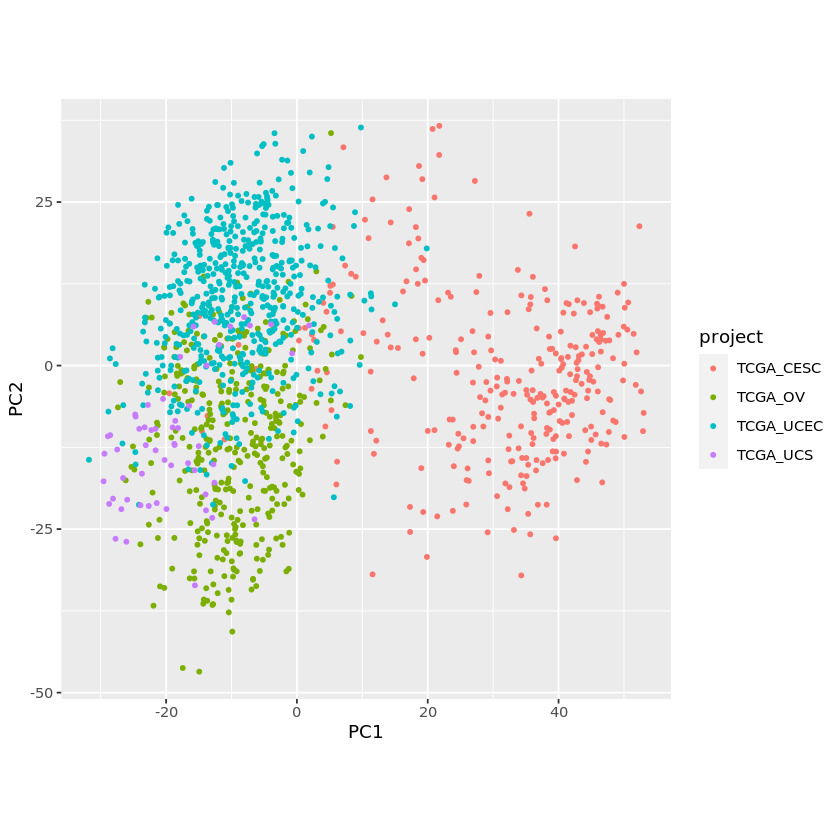

Saving 6.67 x 6.67 in image


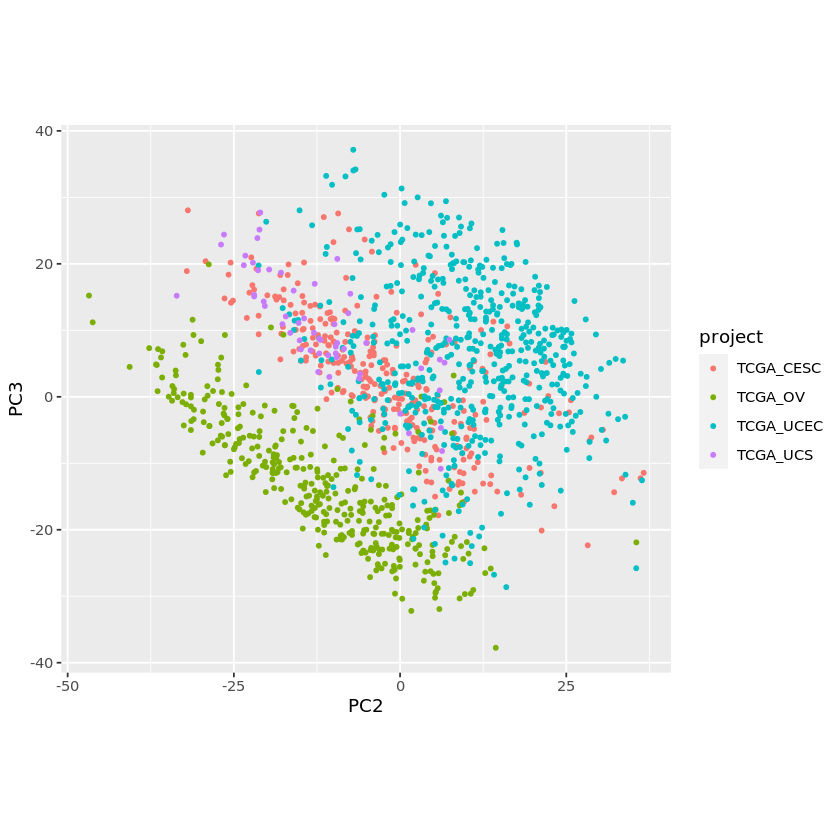

In [117]:
pca_scatter(pca_res_df, "PC1", "PC2", "project")
ggsave(filename = paste(data_root, "TCGA", "figures", "PC2_vs_PC1.png", sep = "/"), last_plot())
pca_scatter(pca_res_df, "PC2", "PC3", "project")
ggsave(filename = paste(data_root, "TCGA", "figures", "PC3_vs_PC2.png", sep = "/"), last_plot())

In [91]:
pca_pivot_df <- pca_res_df%>%
    dplyr::select(sample_name, PC1:PC4, project) %>%
    pivot_longer(cols = PC1:PC4, names_to = "PC", values_to = "loadings")

In [92]:
head(pca_pivot_df)

sample_name,project,PC,loadings
<chr>,<chr>,<chr>,<dbl>
TCGA-JX-A3Q8-01A-11R-A21T-07,TCGA_CESC,PC1,10.954496
TCGA-JX-A3Q8-01A-11R-A21T-07,TCGA_CESC,PC2,19.472349
TCGA-JX-A3Q8-01A-11R-A21T-07,TCGA_CESC,PC3,-10.706288
TCGA-JX-A3Q8-01A-11R-A21T-07,TCGA_CESC,PC4,4.816372
TCGA-C5-A1BK-01B-11R-A13Y-07,TCGA_CESC,PC1,44.522195
TCGA-C5-A1BK-01B-11R-A13Y-07,TCGA_CESC,PC2,-3.829311


Saving 6.67 x 6.67 in image


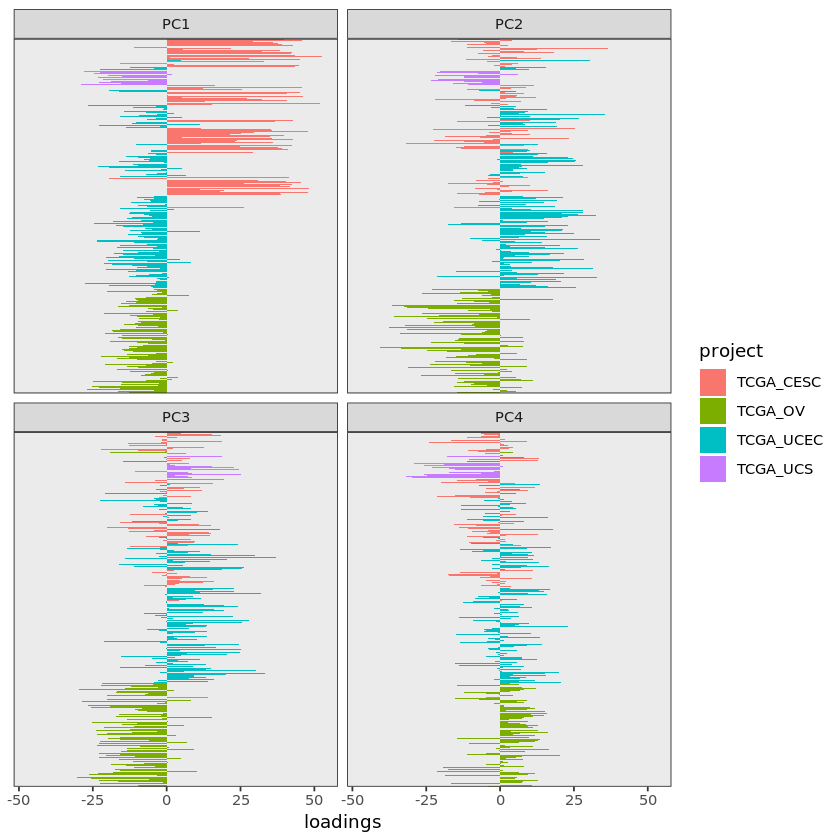

In [118]:
ggplot() +
    geom_bar(data = pca_pivot_df, aes(x=sample_name, y=loadings, fill=project), stat = "identity") +
    facet_wrap(~PC) +
    coord_flip() +
    theme_bw() + 
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.title.y = element_blank()
    )
ggsave(filename = paste(data_root, "TCGA", "figures", "small_multiples_plot.png", sep = "/"), plot = last_plot())

In [98]:
res_umap <- umap(t(matrisome_vst_counts))

In [104]:
colnames(res_umap$layout) <- c("x1", "x2")
umap_df <- res_umap$layout %>%
    as_tibble() %>%
    bind_cols(coldata_df)
dim(umap_df)
head(umap_df)

[1] 1285    5

x1,x2,sample_name,condition,project
<dbl>,<dbl>,<chr>,<chr>,<chr>
2.541911,-3.575904,TCGA-JX-A3Q8-01A-11R-A21T-07,Primary solid Tumor,TCGA_CESC
2.603450,-6.900948,TCGA-C5-A1BK-01B-11R-A13Y-07,Primary solid Tumor,TCGA_CESC
3.299948,-6.971773,TCGA-Q1-A73Q-01A-21R-A32P-07,Primary solid Tumor,TCGA_CESC
2.812767,-6.832167,TCGA-C5-A8YQ-01A-11R-A37O-07,Primary solid Tumor,TCGA_CESC
2.848446,-6.507627,TCGA-VS-A9UC-01A-11R-A42T-07,Primary solid Tumor,TCGA_CESC
2.789277,-6.331377,TCGA-C5-A1MF-01A-11R-A13Y-07,Primary solid Tumor,TCGA_CESC


Saving 6.67 x 6.67 in image


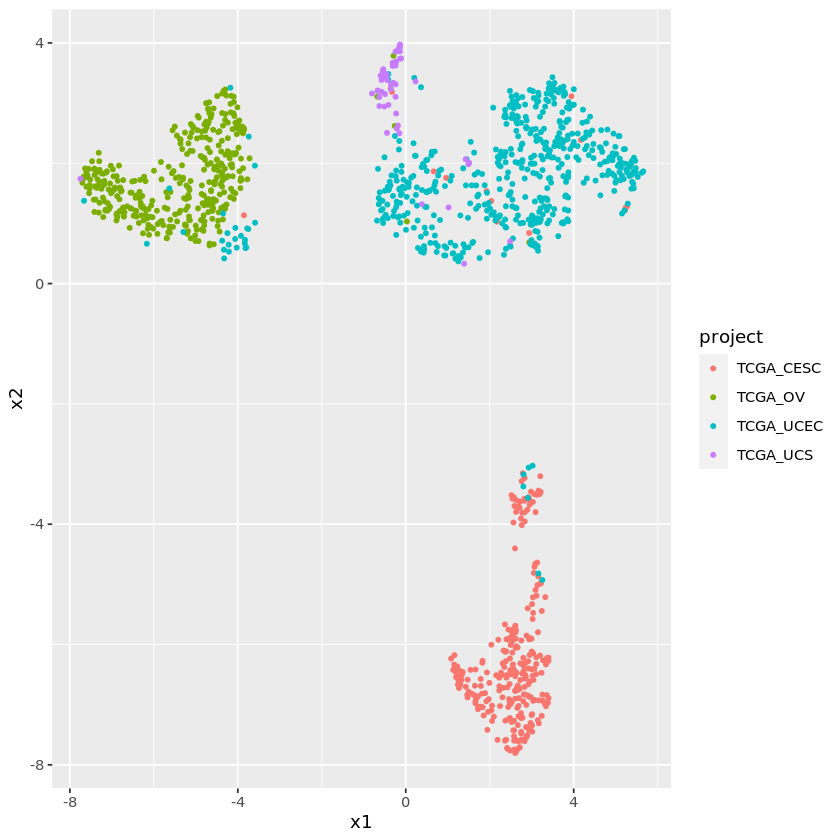

In [119]:
ggplot() +
    geom_point(aes(x = x1, y = x2, color = project), data = umap_df, size = 1)
ggsave(filename = paste(data_root, "TCGA", "figures", "umap.png", sep = "/"), plot = last_plot())